In [7]:
from keras.models import load_model
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
from scipy.signal import savgol_filter
import topsispy as tp
from IPython.display import clear_output
from tensorflow.keras.losses import MAE
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D


             

In [103]:
import Cf_Explain as cfExp

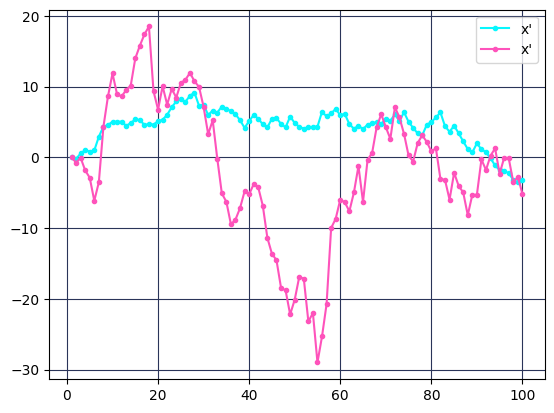

In [8]:
x1 = np.linspace(1, 100,100)
def f1(x):
    y = 0
    result = []
    for _ in x:
        result.append(y)
        y += np.random.normal(scale=1)
    return np.array(result)
def f2(x):
    y = 0
    result = []
    for _ in x:
        result.append(y)
        y += np.random.normal(scale=3)
    return np.array(result)
y1=f1(x1)
y2=f2(x1)
plt.plot(x1, y1, marker='.', label="x'", color='#08F7FE')
plt.plot(x1, y2, marker='.', label="x'", color='#FE53BB')

plt.grid(color='#2A3459')
plt.legend()


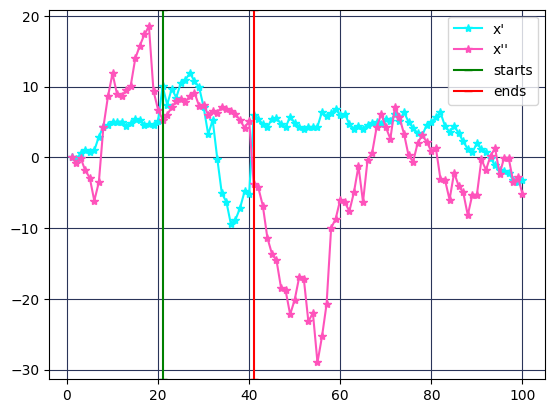

In [9]:
k=np.copy(y1[20:40])
y1[20:40]=y2[20:40]
y2[20:40]=k
plt.plot(x1, y1, marker='*', label="x'", color='#08F7FE')
plt.plot(x1, y2, marker='*', label="x''", color='#FE53BB')

plt.axvline(x = x1[20], marker='_',label = 'starts',color = 'green' )
plt.axvline(x = x1[40], marker='_', label = 'ends',color = 'red')
plt.grid(color='#2A3459')
plt.legend()

In [10]:
I=np.load("..\\Data\\Battery_Data\\I.npy",allow_pickle=True)
V=np.load("..\\Data\\Battery_Data\\Vm.npy",allow_pickle=True)
T=np.load("..\\Data\\Battery_Data\\Tm.npy",allow_pickle=True)
SOC=np.load("..\\Data\\Battery_Data\\SOCm.npy",allow_pickle=True)
timem=np.load("..\\Data\\Battery_Data\\timem.npy",allow_pickle=True)

In [11]:
I1=np.load("..\\Data\\Battery_Data\\I.npy",allow_pickle=True)
V1=np.load("..\\Data\\Battery_Data\\V.npy",allow_pickle=True)
T1=np.load("..\\Data\\Battery_Data\\T.npy",allow_pickle=True)
SOC1=np.load("..\\Data\\Battery_Data\\SOC.npy",allow_pickle=True)

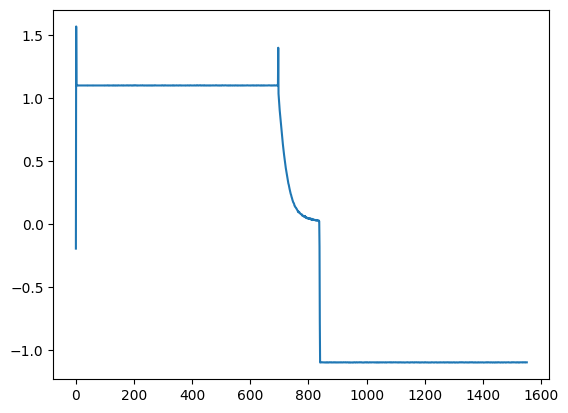

In [12]:
plt.plot(I[0])

In [13]:
train_data=[I,V,T,SOC]

In [14]:
I=[]
V=[]
T=[]
SOC=[]
for i in range(len(train_data[3])):
    for j in range(len(train_data[3][i])):
        I.append(train_data[0][i][j])
        V.append(train_data[1][i][j])
        T.append(train_data[2][i][j])
        SOC.append(train_data[3][i][j])

In [15]:
df_train=pd.DataFrame({"I":I,"V":V,"T":T,"SOC":SOC})

In [16]:
mini,minv,mint,i=df_train.min()
maxi,maxv,maxt,i=df_train.max()

In [17]:
mini,minv,mint,maxi,maxv,maxt=np.load("..\\Data\\Battery_Data\\min_max_soc.npy")

In [18]:
min_max=[mini,minv,mint,maxi,maxv,maxt]

In [19]:
min_max

[-15.0005949768635,
 0.45556685702923,
 16.4348,
 8.009570727272726,
 3.67715008033726,
 38.146893]

In [20]:
df_train["I"]=(df_train["I"]-mini)/(maxi-mini)
df_train["V"]=(df_train["V"]-minv)/(maxv-minv)
df_train["T"]=(df_train["T"]-mint)/(maxt-mint)


In [21]:
def split_sequence(sequence, input_steps, output_steps):
    X = []
    y = []
    time=[]
    
    for i in range(len(sequence) - input_steps - output_steps + 1):
        X.append(np.array(sequence.iloc[i:i+input_steps, :3]))
        time.append(np.array(sequence.iloc[i:i+input_steps,3]))
        y.append(np.array(sequence.iloc[i+input_steps:i+input_steps+output_steps]["SOC"]))

    return X,y,time

In [22]:
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]
input_step=100
output_step=25
X_train,Y_train,time=split_sequence(df_train,input_step,output_step)

In [18]:
np.shape(t)

(165012, 3, 100)

In [24]:
X1=np.float32(X_train)
Y1=np.float32(Y_train)

In [25]:
model=load_model("..\\Data\\Model\\soc_simple_prediction1.h5",custom_objects={'mae':MAE},compile=False)
model.compile(loss='mae',metrics=['mae'],optimizer="adam")

c:\Users\sarbaoui01\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
#timei=time[0]
query_instance1=X1[0]
population = X1[1:100]






In [104]:
ex=cfExp.ExplainCf(
    query_instance=query_instance1,
    model=model,
    population=population,
    Total_cf=20,
    direction="greater",
    feature_name=["Current","Voltage","Temperature"])

In [33]:
np.shape([1,2,3])[0]

3

In [122]:
cefs,index,fitness=ex.conterfactual_generation_GENO_TOPSIS()

selection...:   5%|▌         | 1/20 [00:00<00:07,  2.70it/s]


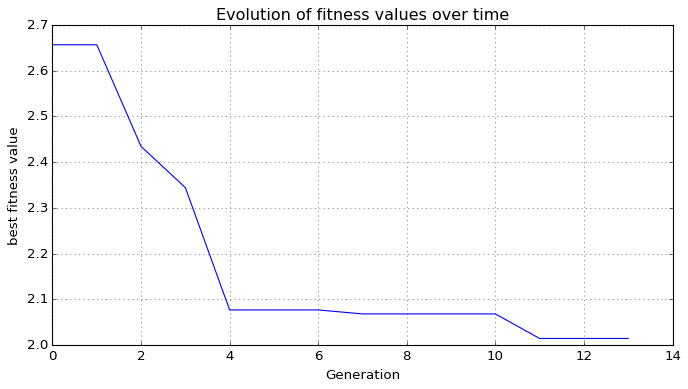

In [123]:
ex.Visualize_fitness(fitness)

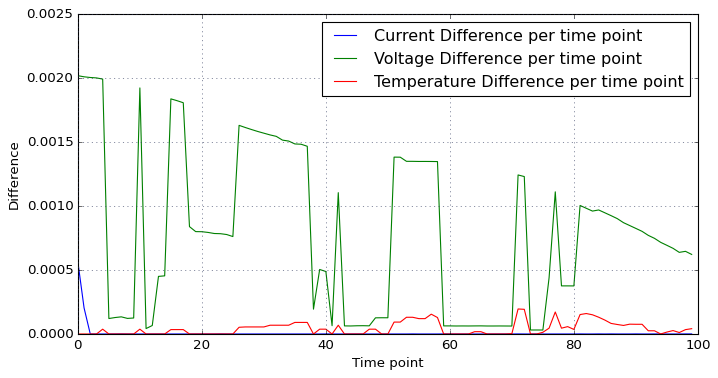

In [124]:
ex.VisualizeDifferencePerTime(cefs,0)

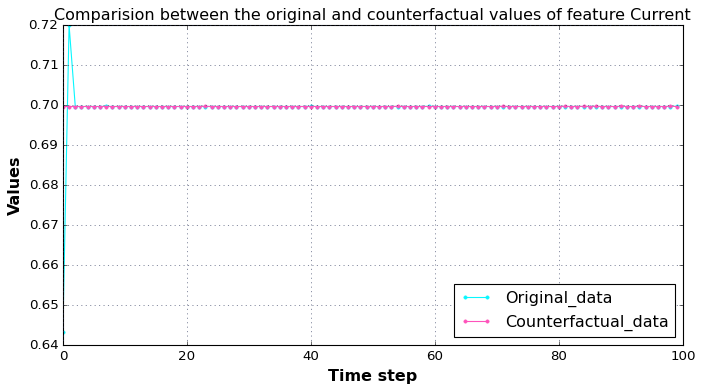

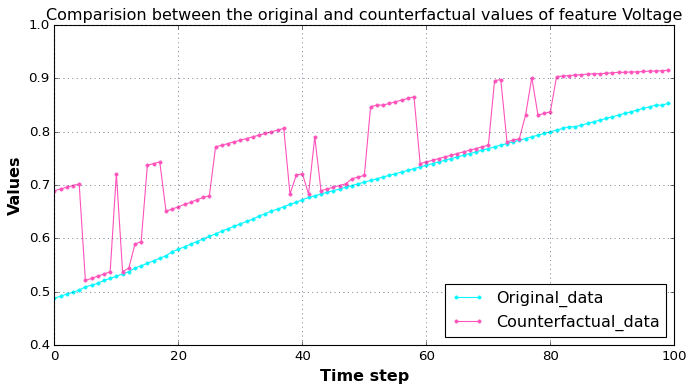

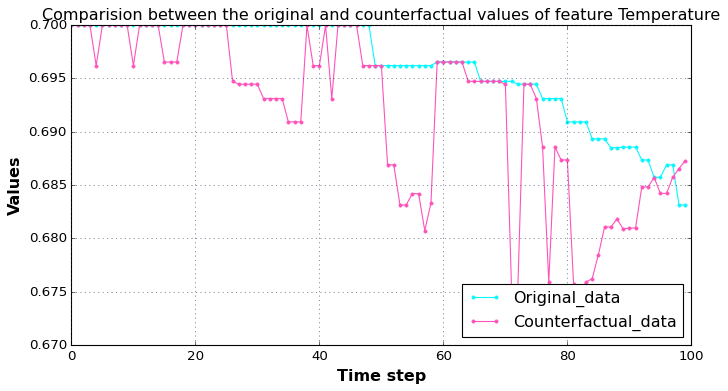

In [125]:
ex.VisualizeComparision(cefs=cefs,index=0,startTime=0)

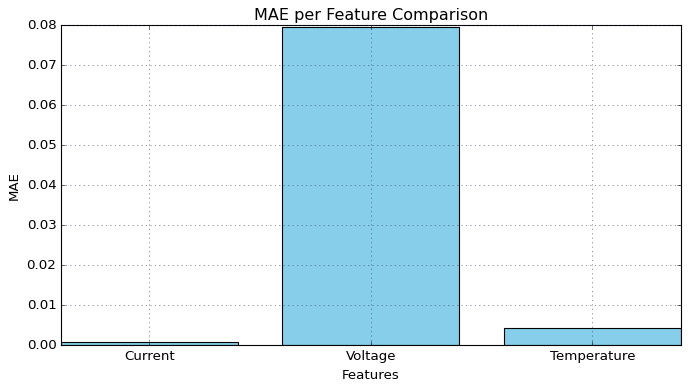

In [126]:
ex.VisualizeMAEPerFeature(cefs,0)

analysing...: 100%|██████████| 20/20 [00:05<00:00,  3.71it/s]


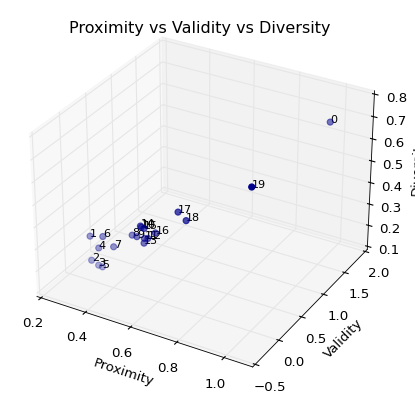

In [127]:
ex.VisualizeDistribution(cefs)

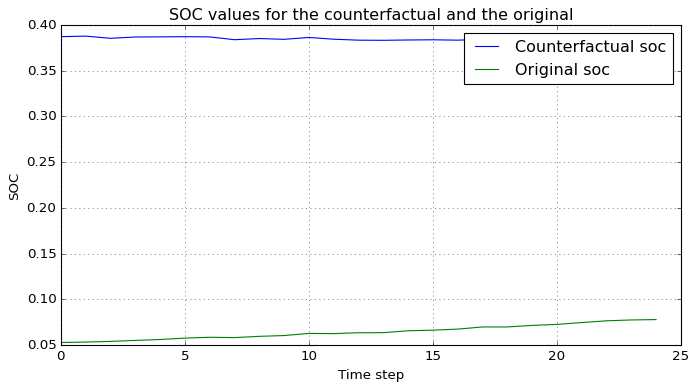

In [128]:
ex.VisualizePrediction(cefs,0,"SOC")

In [105]:
cefs2=ex.conterfactual_generation_NSGA2()

generating...: 100%|██████████| 50/50 [01:40<00:00,  2.01s/it]


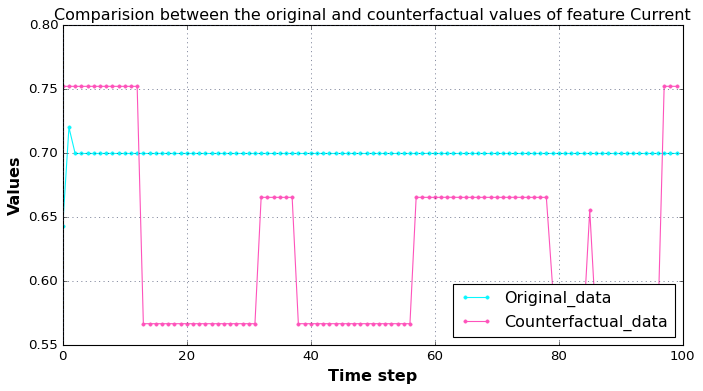

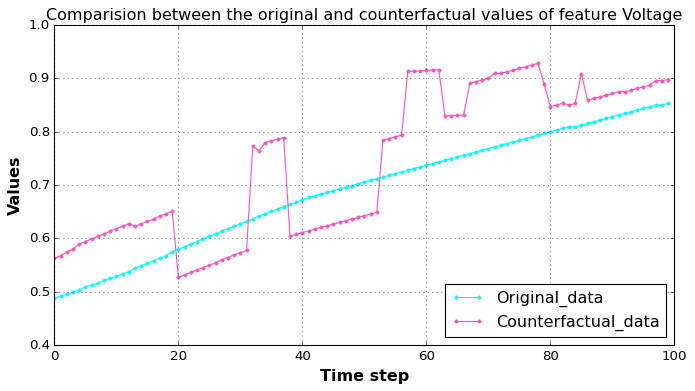

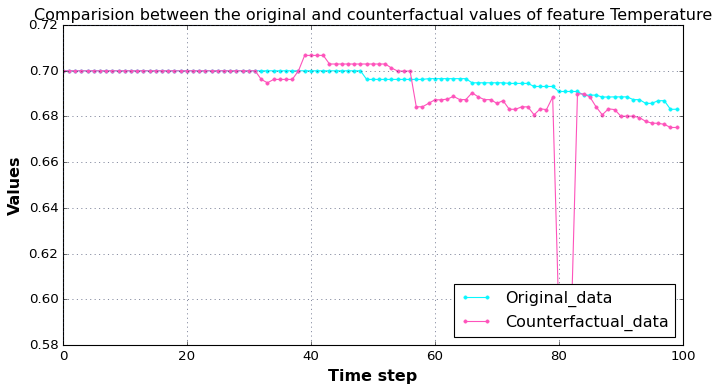

In [118]:
ex.VisualizeComparision(cefs2,index=9,startTime=0)

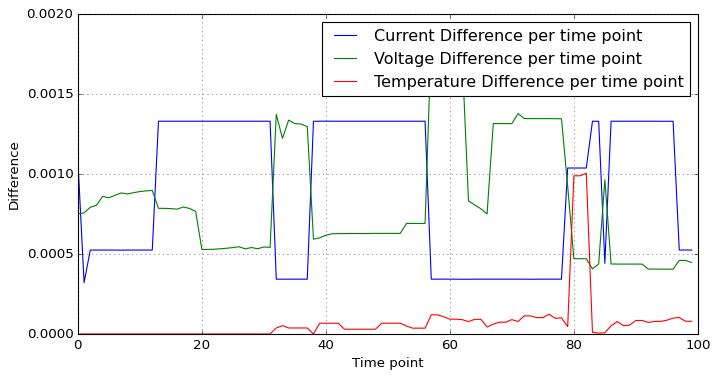

In [117]:
ex.VisualizeDifferencePerTime(cefs2,9)

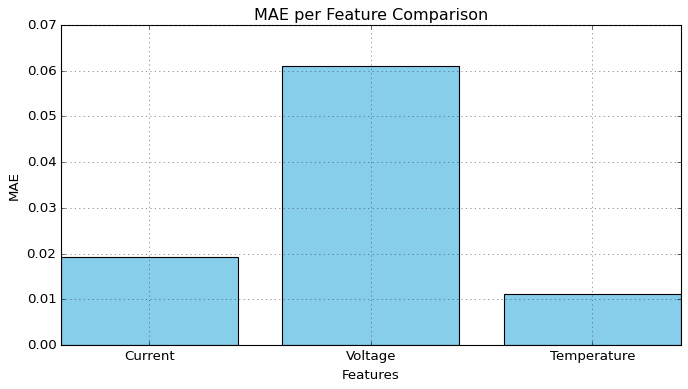

In [110]:
ex.VisualizeMAEPerFeature(cefs2,3)

analysing...: 100%|██████████| 11/11 [00:03<00:00,  3.40it/s]


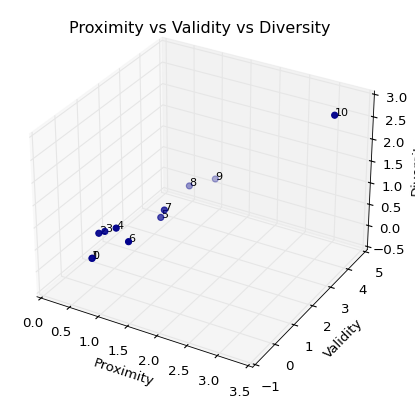

In [116]:
ex.VisualizeDistribution(cefs2)

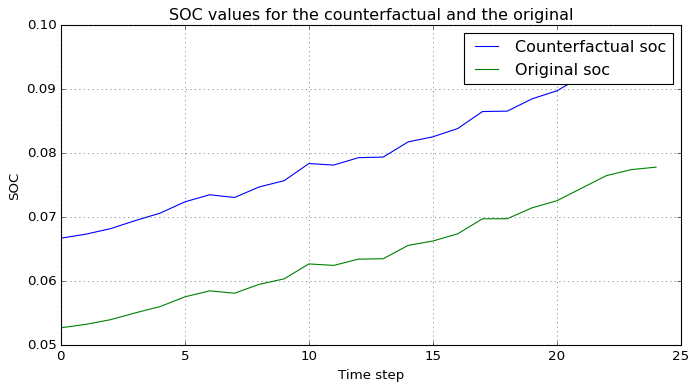

In [121]:
ex.VisualizePrediction(cefs,9,"SOC")